In [1]:
#db scan

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [6]:
floricele = pd.read_csv('iris.csv')
X = floricele[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y_adev = floricele['variety']

In [7]:
label_encoder = LabelEncoder()
y_adev_num = label_encoder.fit_transform(y_adev)

In [11]:
# standardizare = le fortam sa semene cu o gausiana 
scaler = StandardScaler()
X_scalat = scaler.fit_transform(X)
floricele_scalat = pd.DataFrame(X_scalat, columns = X.columns)

In [12]:
floricele_scalat.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [14]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
# raza de 0.5, nr min de vecini pt a fi centroid = 5

In [16]:
dbscan_etichete = dbscan.fit_predict(X_scalat)

In [18]:
dbscan_etichete
# -1 reprezinta noise

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

Text(0, 0.5, 'Sepal width (scalat)')

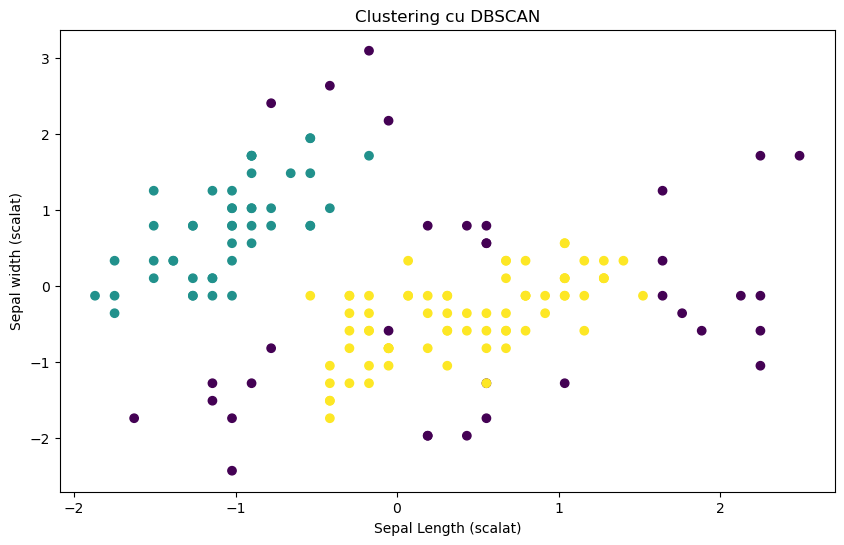

In [20]:
plt.figure(figsize = (10,6))
plt.scatter(X_scalat[:,0], X_scalat[:,1], c = dbscan_etichete, cmap = 'viridis')
plt.title('Clustering cu DBSCAN')
plt.xlabel('Sepal Length (scalat)')
plt.ylabel('Sepal width (scalat)')

In [21]:
# evaluare
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score

In [26]:
dbscan_non_noise = (dbscan_etichete != 1)

In [27]:
dbscan_silhouette = silhouette_score(X_scalat[dbscan_non_noise], dbscan_etichete[dbscan_non_noise])

In [28]:
dbscan_silhouette

0.5003349350890197